In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("../../2018.csv")
application_df.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,...,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [3]:
application_df.shape

(7213446, 28)

In [4]:
top_airports= ["ATL","ORD","DFW","CLT","DEN"]
##"LAX","PHX","IAH","SFO","LAS"]
top_airlines=["WN", "AA", "DL", "OO", "UA"]
application_df_top10 = application_df.loc[(application_df['ORIGIN'].isin(top_airports) & application_df['DEST'].isin(top_airports) & application_df['OP_CARRIER'].isin(top_airlines))]


In [5]:
application_df_top10.shape

(100170, 28)

In [6]:
weather_df = pd.read_csv("../../Weather_data_top_5_stations.csv")

In [7]:
weather_df.head()

,AIRPORT CODE,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10
0,CLT,"CHARLOTTE DOUGLAS AIRPORT, NC US",1/1/2018,9.84,NaN,0.0,0.0,0.0,25,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CLT,"CHARLOTTE DOUGLAS AIRPORT, NC US",1/2/2018,3.13,NaN,0.0,0.0,0.0,21,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CLT,"CHARLOTTE DOUGLAS AIRPORT, NC US",1/3/2018,5.14,NaN,0.0,0.0,0.0,25,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CLT,"CHARLOTTE DOUGLAS AIRPORT, NC US",1/4/2018,9.84,NaN,0.0,0.0,0.0,26,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CLT,"CHARLOTTE DOUGLAS AIRPORT, NC US",1/5/2018,4.92,NaN,0.0,0.0,0.0,23,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
weather_df_clean = weather_df[["AIRPORT CODE","DATE","PRCP","SNOW","SNWD"]]

In [9]:
application_df_top10["FL_DATE"] = pd.to_datetime(application_df_top10["FL_DATE"])
weather_df_clean["DATE"] = pd.to_datetime(weather_df_clean["DATE"])

c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
weather_df_clean.head()


,AIRPORT CODE,DATE,PRCP,SNOW,SNWD
0,CLT,2018-01-01,0.0,0.0,0.0
1,CLT,2018-01-02,0.0,0.0,0.0
2,CLT,2018-01-03,0.0,0.0,0.0
3,CLT,2018-01-04,0.0,0.0,0.0
4,CLT,2018-01-05,0.0,0.0,0.0


In [11]:
#application_df_top10["YEAR"]=application_df_top10["FL_DATE"].dt.year
application_df_top10["MONTH"]=application_df_top10["FL_DATE"].dt.month
application_df_top10["DAY"]=application_df_top10["FL_DATE"].dt.day
application_df_top10["WEEKDAY"]=application_df_top10["FL_DATE"].dt.dayofweek


c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [8]:
#application_df_top10["TIME_CATEGORY"] = 0
#application_df_top10.loc[(application_df_top10["CRS_DEP_TIME"] >= 0) & (application_df_top10["CRS_DEP_TIME"] < 600), "TIME_CATEGORY"] = 1
#application_df_top10.loc[(application_df_top10["CRS_DEP_TIME"] >= 600) & (application_df_top10["CRS_DEP_TIME"] < 1200), "TIME_CATEGORY"] = 2
#application_df_top10.loc[(application_df_top10["CRS_DEP_TIME"] >= 1200) & (application_df_top10["CRS_DEP_TIME"] < 1800), "TIME_CATEGORY"] = 3
#application_df_top10.loc[(application_df_top10["CRS_DEP_TIME"] >= 1800) & (application_df_top10["CRS_DEP_TIME"] < 2400), "TIME_CATEGORY"] = 4


In [12]:
application_df_top10['DELAY'] = np.where((application_df_top10.ARR_DELAY > 0), 1, 0)

c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
application_df_top10.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,MONTH,DAY,WEEKDAY,DELAY
38,2018-01-01,UA,2385,DEN,ORD,915,909.0,-6.0,12.0,921.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0
58,2018-01-01,UA,2158,ORD,CLT,2101,2127.0,26.0,16.0,2143.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0
143,2018-01-01,UA,2071,ORD,DEN,1345,1342.0,-3.0,18.0,1400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0
194,2018-01-01,UA,2015,ORD,DEN,2245,2246.0,1.0,18.0,2304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0
369,2018-01-01,UA,1822,DFW,DEN,915,907.0,-8.0,13.0,920.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0


In [14]:
flight_data_df1 = pd.merge(application_df_top10,weather_df_clean, left_on=["FL_DATE","ORIGIN"], right_on=["DATE","AIRPORT CODE"], how="inner")


In [15]:
flight_data_df1=flight_data_df1.rename(columns={'PRCP':'ORIGIN_PRCP', 'SNOW':'ORIGIN_SNOW','SNWD':'ORIGIN_SNWD'})
flight_data_df1.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,Unnamed: 27,MONTH,DAY,WEEKDAY,DELAY,AIRPORT CODE,DATE,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD
0,2018-01-01,UA,2385,DEN,ORD,915,909.0,-6.0,12.0,921.0,...,NaN,1,1,0,0,DEN,2018-01-01,0.0,0.0,0.0
1,2018-01-01,UA,1505,DEN,CLT,1745,1744.0,-1.0,19.0,1803.0,...,NaN,1,1,0,0,DEN,2018-01-01,0.0,0.0,0.0
2,2018-01-01,UA,830,DEN,ORD,1635,1627.0,-8.0,14.0,1641.0,...,NaN,1,1,0,0,DEN,2018-01-01,0.0,0.0,0.0
3,2018-01-01,UA,703,DEN,ORD,1431,1426.0,-5.0,13.0,1439.0,...,NaN,1,1,0,0,DEN,2018-01-01,0.0,0.0,0.0
4,2018-01-01,UA,682,DEN,ORD,753,748.0,-5.0,25.0,813.0,...,NaN,1,1,0,1,DEN,2018-01-01,0.0,0.0,0.0


In [16]:
flight_data_df1 = pd.merge(flight_data_df1,weather_df_clean, left_on=["FL_DATE","DEST"], right_on=["DATE","AIRPORT CODE"], how="inner")

In [17]:
flight_data_df1=flight_data_df1.rename(columns={'PRCP':'DEST_PRCP', 'SNOW':'DEST_SNOW','SNWD':'DEST_SNWD'})
flight_data_df1.head()


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIRPORT CODE_x,DATE_x,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,AIRPORT CODE_y,DATE_y,DEST_PRCP,DEST_SNOW,DEST_SNWD
0,2018-01-01,UA,1505,DEN,CLT,1745,1744.0,-1.0,19.0,1803.0,...,DEN,2018-01-01,0.0,0.0,0.0,CLT,2018-01-01,0.0,0.0,0.0
1,2018-01-01,OO,5197,DEN,CLT,1005,1004.0,-1.0,24.0,1028.0,...,DEN,2018-01-01,0.0,0.0,0.0,CLT,2018-01-01,0.0,0.0,0.0
2,2018-01-01,AA,428,DEN,CLT,1011,1026.0,15.0,12.0,1038.0,...,DEN,2018-01-01,0.0,0.0,0.0,CLT,2018-01-01,0.0,0.0,0.0
3,2018-01-01,AA,671,DEN,CLT,806,1140.0,214.0,14.0,1154.0,...,DEN,2018-01-01,0.0,0.0,0.0,CLT,2018-01-01,0.0,0.0,0.0
4,2018-01-01,AA,2045,DEN,CLT,1606,1632.0,26.0,13.0,1645.0,...,DEN,2018-01-01,0.0,0.0,0.0,CLT,2018-01-01,0.0,0.0,0.0


In [18]:
flight_data_df1=flight_data_df1.drop(["AIRPORT CODE_x","DATE_x","AIRPORT CODE_y","DATE_y"],axis=1)
flight_data_df1.head()


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,MONTH,DAY,WEEKDAY,DELAY,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,DEST_PRCP,DEST_SNOW,DEST_SNWD
0,2018-01-01,UA,1505,DEN,CLT,1745,1744.0,-1.0,19.0,1803.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-01,OO,5197,DEN,CLT,1005,1004.0,-1.0,24.0,1028.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-01,AA,428,DEN,CLT,1011,1026.0,15.0,12.0,1038.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-01,AA,671,DEN,CLT,806,1140.0,214.0,14.0,1154.0,...,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01,AA,2045,DEN,CLT,1606,1632.0,26.0,13.0,1645.0,...,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
flight_data_df = flight_data_df1.drop(["OP_CARRIER_FL_NUM","CANCELLATION_CODE","Unnamed: 27"],axis=1)
flight_data_df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,MONTH,DAY,WEEKDAY,DELAY,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,DEST_PRCP,DEST_SNOW,DEST_SNWD
0,2018-01-01,UA,DEN,CLT,1745,1744.0,-1.0,19.0,1803.0,2230.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-01,OO,DEN,CLT,1005,1004.0,-1.0,24.0,1028.0,1506.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-01,AA,DEN,CLT,1011,1026.0,15.0,12.0,1038.0,1503.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-01,AA,DEN,CLT,806,1140.0,214.0,14.0,1154.0,1621.0,...,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01,AA,DEN,CLT,1606,1632.0,26.0,13.0,1645.0,2110.0,...,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
flight_data_df.columns

Index(['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'MONTH', 'DAY', 'WEEKDAY', 'DELAY',
       'ORIGIN_PRCP', 'ORIGIN_SNOW', 'ORIGIN_SNWD', 'DEST_PRCP', 'DEST_SNOW',
       'DEST_SNWD'],
      dtype='object')

In [21]:
flight_data_df = flight_data_df.fillna(0)

In [22]:
flight_data_df.shape

(100060, 35)

In [23]:
flight_data_df.corr()

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,...,MONTH,DAY,WEEKDAY,DELAY,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,DEST_PRCP,DEST_SNOW,DEST_SNWD
CRS_DEP_TIME,1.000000,0.924769,0.119343,0.026865,0.908179,0.678872,-0.015551,0.759671,0.631840,0.103075,...,-0.001716,0.000948,0.012132,0.117370,0.014892,-0.007455,-0.006087,-0.011358,0.010344,0.008712
DEP_TIME,0.924769,1.000000,0.155209,0.086071,0.982370,0.751317,0.031305,0.723113,0.704026,0.138277,...,-0.004651,-0.002333,0.012407,0.165343,-0.004730,-0.030509,-0.013392,-0.021252,-0.017728,0.001856
DEP_DELAY,0.119343,0.155209,1.000000,0.074547,0.136927,0.032968,0.015632,0.096866,0.024014,0.937033,...,0.015478,-0.003352,-0.022231,0.383640,0.098972,0.075106,0.038799,0.069513,0.069566,0.029712
TAXI_OUT,0.026865,0.086071,0.074547,1.000000,0.119442,0.092569,0.039012,0.030568,0.091451,0.276612,...,0.009176,0.001891,-0.022657,0.346222,0.085715,0.098099,0.027148,0.037744,0.009469,0.013301
WHEELS_OFF,0.908179,0.982370,0.136927,0.119442,1.000000,0.768624,0.037199,0.717083,0.721196,0.130865,...,-0.003860,-0.001944,0.013708,0.168568,-0.006468,-0.030171,-0.011984,-0.023841,-0.017560,0.002660
WHEELS_ON,0.678872,0.751317,0.032968,0.092569,0.768624,1.000000,0.078372,0.787345,0.950816,0.038072,...,-0.009983,-0.002187,0.017610,0.106339,-0.038715,-0.030980,-0.010999,-0.029983,-0.028337,-0.007284
TAXI_IN,-0.015551,0.031305,0.015632,0.039012,0.037199,0.078372,1.000000,0.035869,0.087572,0.145196,...,0.060663,0.004381,-0.004042,0.193415,-0.012676,-0.034287,-0.030412,0.079947,0.049533,0.052278
CRS_ARR_TIME,0.759671,0.723113,0.096866,0.030568,0.717083,0.787345,0.035869,1.000000,0.784243,0.087909,...,-0.005900,0.001804,0.011705,0.103466,-0.008546,-0.006495,-0.012008,-0.002721,-0.000187,0.000711
ARR_TIME,0.631840,0.704026,0.024014,0.091451,0.721196,0.950816,0.087572,0.784243,1.000000,0.029610,...,-0.008081,-0.001387,0.015736,0.095273,-0.039694,-0.031388,-0.010992,-0.030377,-0.029045,-0.007012
ARR_DELAY,0.103075,0.138277,0.937033,0.276612,0.130865,0.038072,0.145196,0.087909,0.029610,1.000000,...,0.035845,-0.001791,-0.027381,0.520284,0.112514,0.096658,0.043342,0.113538,0.078389,0.033911


<AxesSubplot:>

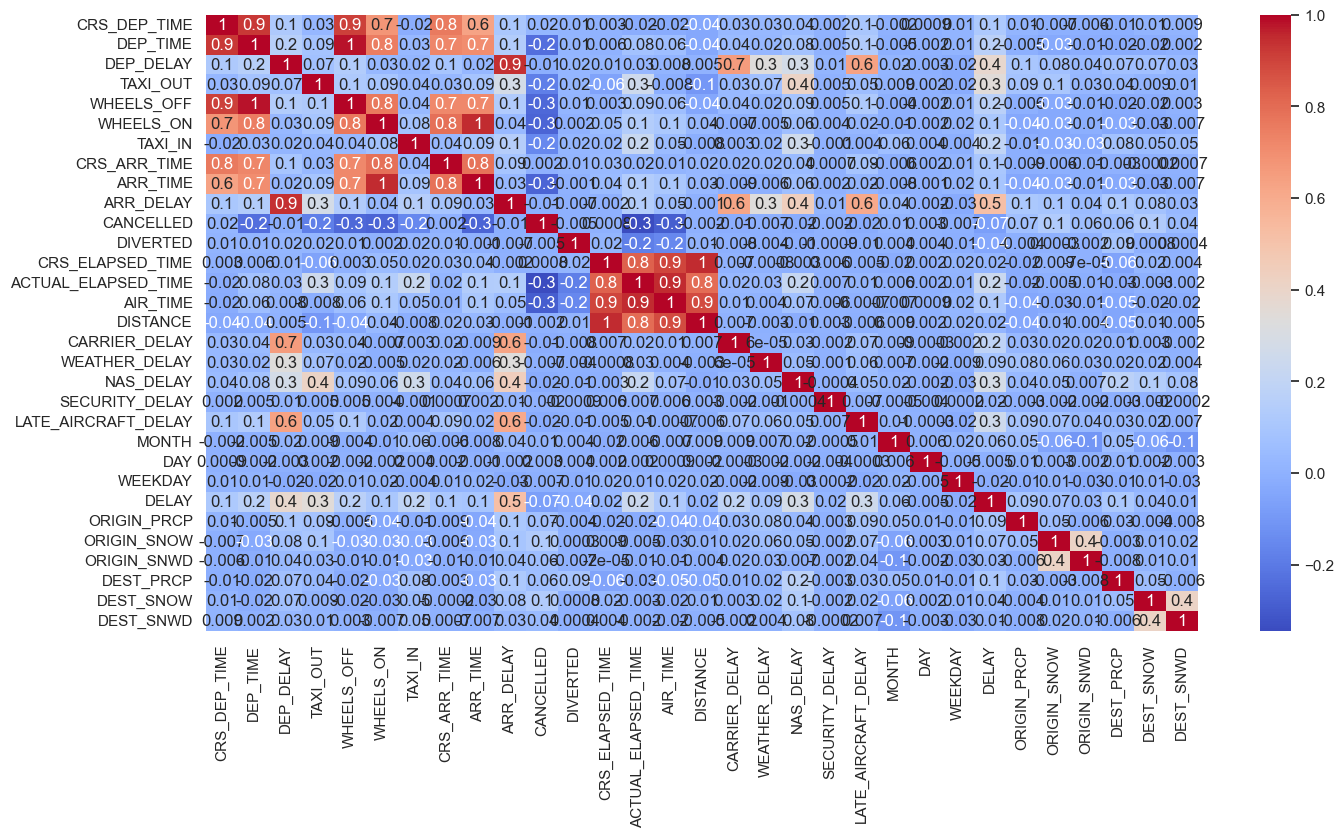

In [24]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(flight_data_df.corr(), annot = True,fmt='.1g',cmap= 'coolwarm')


In [25]:
flight_data_df = flight_data_df.drop(["FL_DATE","DEP_DELAY", "ARR_DELAY","DEP_TIME","ARR_TIME","AIR_TIME","ACTUAL_ELAPSED_TIME","DISTANCE","WHEELS_ON","WHEELS_OFF","TAXI_IN","TAXI_OUT","LATE_AIRCRAFT_DELAY","NAS_DELAY","CARRIER_DELAY","WEATHER_DELAY","SECURITY_DELAY"],axis=1)

In [26]:
flight_data_df.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,MONTH,DAY,WEEKDAY,DELAY,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,DEST_PRCP,DEST_SNOW,DEST_SNWD
0,UA,DEN,CLT,1745,2300,0.0,0.0,195.0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,OO,DEN,CLT,1005,1528,0.0,0.0,203.0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,AA,DEN,CLT,1011,1529,0.0,0.0,198.0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,AA,DEN,CLT,806,1321,0.0,0.0,195.0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0
4,AA,DEN,CLT,1606,2113,0.0,0.0,187.0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
flight_data_df.columns

Index(['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'MONTH', 'DAY', 'WEEKDAY',
       'DELAY', 'ORIGIN_PRCP', 'ORIGIN_SNOW', 'ORIGIN_SNWD', 'DEST_PRCP',
       'DEST_SNOW', 'DEST_SNWD'],
      dtype='object')

In [27]:
# Convert categorical data to numeric with `pd.get_dummies`
X = flight_data_df.drop(columns=['CANCELLED','DIVERTED','DELAY'])
X = pd.get_dummies(X)
X.head()

,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,MONTH,DAY,WEEKDAY,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,DEST_PRCP,...,ORIGIN_ATL,ORIGIN_CLT,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_ORD,DEST_ATL,DEST_CLT,DEST_DEN,DEST_DFW,DEST_ORD
0,1745,2300,195.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1,1005,1528,203.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
2,1011,1529,198.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
3,806,1321,195.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
4,1606,2113,187.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0


In [28]:
list(X.columns)

['CRS_DEP_TIME',
 'CRS_ARR_TIME',
 'CRS_ELAPSED_TIME',
 'MONTH',
 'DAY',
 'WEEKDAY',
 'ORIGIN_PRCP',
 'ORIGIN_SNOW',
 'ORIGIN_SNWD',
 'DEST_PRCP',
 'DEST_SNOW',
 'DEST_SNWD',
 'OP_CARRIER_AA',
 'OP_CARRIER_DL',
 'OP_CARRIER_OO',
 'OP_CARRIER_UA',
 'OP_CARRIER_WN',
 'ORIGIN_ATL',
 'ORIGIN_CLT',
 'ORIGIN_DEN',
 'ORIGIN_DFW',
 'ORIGIN_ORD',
 'DEST_ATL',
 'DEST_CLT',
 'DEST_DEN',
 'DEST_DFW',
 'DEST_ORD']

## Model for predicting delay

In [31]:
# Split our preprocessed data into our features and target arrays
#y = flight_data_df[['DIVERTED']]
y = flight_data_df[['DELAY']]

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.45)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
num_of_features = len(X_test_scaled[0])
print(num_of_features)

27


In [34]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation = 'sigmoid', input_dim = num_of_features))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=25, activation = 'sigmoid'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=12, activation = 'sigmoid'))
# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=6, activation = 'sigmoid'))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=3, activation = 'sigmoid'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1400      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 12)                312       
                                                                 
 dense_3 (Dense)             (None, 6)                 78        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 3,090
Trainable params: 3,090
Non-trainabl

In [35]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

In [36]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1720/1720 [==============================] - 6s 3ms/step - loss: 0.6447 - accuracy: 0.6326
Epoch 2/100
1720/1720 [==============================] - 5s 3ms/step - loss: 0.6270 - accuracy: 0.6610
Epoch 3/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.6242 - accuracy: 0.6614
Epoch 4/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.6225 - accuracy: 0.6621
Epoch 5/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.6214 - accuracy: 0.6635
Epoch 6/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.6206 - accuracy: 0.6649
Epoch 7/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.6196 - accuracy: 0.6649
Epoch 8/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.6184 - accuracy: 0.6664
Epoch 9/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.6173 - accuracy: 0.6679
Epoch 10/100
1720/1720 [==============================] - 5s 3ms/step - l

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1408/1408 - 3s - loss: 0.6071 - accuracy: 0.6811 - 3s/epoch - 2ms/step
Loss: 0.6071245074272156, Accuracy: 0.6810580492019653


### Model for predicting diversion

In [35]:
# Convert categorical data to numeric with `pd.get_dummies`
X = flight_data_df.drop(columns=['CANCELLED','DIVERTED','DELAY'])
X = pd.get_dummies(X)
X.head()

,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,MONTH,DAY,WEEKDAY,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,DEST_PRCP,...,ORIGIN_ATL,ORIGIN_CLT,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_ORD,DEST_ATL,DEST_CLT,DEST_DEN,DEST_DFW,DEST_ORD
0,1745,2300,195.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1,1005,1528,203.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
2,1011,1529,198.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
3,806,1321,195.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
4,1606,2113,187.0,1,1,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0


In [36]:
# Split our preprocessed data into our features and target arrays
y = flight_data_df[['DIVERTED']]
#y = flight_data_df[['DELAY']]

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.45)

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
num_of_features = len(X_test_scaled[0])
print(num_of_features)

27


In [39]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation = 'sigmoid', input_dim = num_of_features))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=25, activation = 'sigmoid'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=12, activation = 'sigmoid'))
# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=6, activation = 'sigmoid'))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=3, activation = 'sigmoid'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1400      
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 dense_8 (Dense)             (None, 12)                312       
                                                                 
 dense_9 (Dense)             (None, 6)                 78        
                                                                 
 dense_10 (Dense)            (None, 3)                 21        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 3,090
Trainable params: 3,090
Non-traina

In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1720/1720 [==============================] - 6s 3ms/step - loss: 0.2860 - accuracy: 0.9074
Epoch 2/100
1720/1720 [==============================] - 4s 3ms/step - loss: 0.0385 - accuracy: 0.9974
Epoch 3/100
1720/1720 [==============================] - 4s 3ms/step - loss: 0.0220 - accuracy: 0.9974
Epoch 4/100
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9974
Epoch 5/100
1720/1720 [==============================] - 4s 3ms/step - loss: 0.0182 - accuracy: 0.9974
Epoch 6/100
1720/1720 [==============================] - 4s 3ms/step - loss: 0.0182 - accuracy: 0.9974
Epoch 7/100
1720/1720 [==============================] - 4s 3ms/step - loss: 0.0182 - accuracy: 0.9974
Epoch 8/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.0182 - accuracy: 0.9974
Epoch 9/100
1720/1720 [==============================] - 4s 2ms/step - loss: 0.0182 - accuracy: 0.9974
Epoch 10/100
1720/1720 [==============================] - 5s 3ms/step - l

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1408/1408 - 2s - loss: 0.0187 - accuracy: 0.9972 - 2s/epoch - 2ms/step
Loss: 0.018707387149333954, Accuracy: 0.9971794486045837
